<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
#ваш код здесь
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';') # читаем файл
hh_data.shape # смотрим чему равна размерность таблицы

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
#ваш код здесь
hh_data.head

<bound method NDFrame.head of                                        Пол, возраст           ЗП  \
0        Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1         Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2      Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3          Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4         Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   
...                                             ...          ...   
44739    Мужчина ,  30 лет , родился 17 января 1989   50000 руб.   
44740      Мужчина ,  27 лет , родился 5 марта 1992   39000 руб.   
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

                               Ищет работу на должность:  \
0                                Системный администратор   
1                                

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
#ваш код здесь
hh_data.info()
#Сколько уникальных значений содержится в столбце «Опыт работы»?
print(f"Количетсво уникальных значений в столбце Опыт работы: {hh_data['Опыт работы'].nunique()}")
# Какая из искомых должностей самая распространённая? Введите название.
print(f"Самая распростаненная  желаемая длжность: {hh_data['Ищет работу на должность:'].value_counts().idxmax()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [5]:
#ваш код здесь
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
#ваш код здесь
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: ' '.join(x.split()[:2])) # создаем признак 'Образование'
display(hh_data['Образование'].value_counts()) # сделаем небольшую сводную для анализа признака 'Образование'
hh_data.drop('Образование и ВУЗ', axis= 1 , inplace= True ) # Удаляем признак "Образование и ВУЗ"

#Сколько соискателей имеет средний уровень образования (школьное образование)?
print(f"Количество соискателей имеющих средний уровень образования:{hh_data[hh_data['Образование'] == 'Среднее образование'].shape[0]}")

Образование
Высшее образование     33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее образование      559
Name: count, dtype: int64

Количество соискателей имеющих средний уровень образования:559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
# создаем признак 'Пол'
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x[:1])
# создаем признак 'Возраст'
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: x.split(',')[1].split()[0]).astype('int64') # создаем признак 'Возраст'
# Удаляем признак "Пол, возраст"
hh_data.drop('Пол, возраст', axis=1, inplace = True)
# Выводим обновленную таблицу
display(hh_data.info())

#Сколько процентов женских резюме представлено в наших данных
women_percent  = round(hh_data[hh_data['Пол']=='Ж'].shape[0]*100/hh_data['Пол'].shape[0], 2)
print(f"Сколько процентов женских резюме представлено в наших данных: {women_percent}")

#Чему равен средний возраст соискателей?
age_mean = round(hh_data['Возраст'].mean(),1)
print(f"Средний возраст соискателей: {age_mean}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График                           44744 non-null  object
 5   Опыт работы                      44576 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Обновление резюме                44744 non-null  object
 9   Авто                             44744 non-null  object
 10  Образование                      44744 non-null  object
 11  Пол                              44744 non-null  object
 12  Возраст                         

None

Сколько процентов женских резюме представлено в наших данных: 19.07
Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
#ваш код здесь
def get_experience(arg):
    """Функция определяет опыт работы в месяцах из входной строки

    Args:
        arg (str): Строка, содержащая информацию о опыте работы

    Returns:
        int: Возвращает опыт работы в месяцах
    """    
    if arg!=arg or arg == 'Не указано':
        return np.nan
    arg_lst = arg.split(' ')[2:6]# деление строки arg на "слова" по пробелам и срез со второго слова ('работы') и по пятое слово ('месяц')
    total_month=0
    for word in arg_lst:
        if word.isdigit():
            total_month+=int(word)            
        elif word.startswith('лет') or word.startswith('год'):
            total_month*=12
        elif word.startswith('мес'):
            total_month*=1
            break
    return total_month
    
# Применяем функцию и создаем новый признак 'Опыт работы (месяц)'
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)

# Удаляем признак "Опыт работы"
hh_data.drop('Опыт работы', axis=1, inplace = True)

#Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print(f"Мдианный опыт работы (в месяцах): {hh_data['Опыт работы (месяц)'].median()}")

Мдианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
#список городов, попадающих в категорию 'город миллионник'
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону',
                  'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

#Функция создания признака "Город" в которой 4 категории:
# 'Москва', 'Санкт-Петербург', 'город миллионник', 'Другие'
def get_city(arg):
    """Функцию извлекает город из входной строки

    Args:
        arg ([str]): Строка содержащая информацию из признака "Город, переезд, командировки"

    Returns:
        [str]: Строка с 4-мя значениями: Москва, Сант-Питербург, город-миллионник, другие
    """
    city = arg.split(',')[0].strip()
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
# Применяем функцию 
hh_data['Город']=hh_data['Город, переезд, командировки'].apply(get_city)

#Функция создания признака "Готовность к переезду"
def get_relocation(arg):
    """Функцию извлекает о готовности к переезду

    Args:
        arg (str): Строка содержащая информацию из признака "Город, переезд, командировки"

    Returns:
        [bool]: True - готов к переезду, False - не готов к переезду.
    """
    arg_list = arg.lower().split(',')
    for elem in arg_list:
        elem_list = elem.split()
        for word in elem_list:
            if word.strip().startswith('перее'):
                if 'не' in elem_list:
                    return False
                else:
                    return True
# Применяем функцию 
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_relocation)

def get_business_trip(arg):
    """Функция извлекает информацию о командировках

    Args:
        arg ([str]): Строка содержащая информацию из признака "Город, переезд, командировки"

    Returns:
        [bool]: True - готов к командировкам, False - не готов к командировкам.
    """
    arg_list = arg.lower().split(',')
    for elem in arg_list:
        elem_list = elem.split()
        for word in elem_list:
            if word.strip().startswith('командир'):
                if 'не' in elem_list:
                    return False
                else:
                    return True
    return False

# Применяем функцию
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_business_trip)

#удаляем признак 'Город, переезд, командировки'
hh_data.drop('Город, переезд, командировки', axis=1, inplace = True)

#Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
live_in_Peterburg_percent = round(hh_data[hh_data['Город']=='Санкт-Петербург'].shape[0]/hh_data.shape[0]*100)
print(f"Процентов соискателей живут в Санкт-Петербурге: {live_in_Peterburg_percent}")

#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
mask_ready_for_reloc_and_btrip = (hh_data['Готовность к переезду']==True)&(hh_data['Готовность к командировкам']==True)
ready_for_reloc_and_btrip_pcnt=round(hh_data[mask_ready_for_reloc_and_btrip].shape[0]/hh_data.shape[0]*100)
print(f"Процентов соискателей готовы одновременно и к переездам, и к командировкам: {ready_for_reloc_and_btrip_pcnt}")

Процентов соискателей живут в Санкт-Петербурге: 11
Процентов соискателей готовы одновременно и к переездам, и к командировкам: 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
#Преобразование признаков 'Занятость' и 'График' в признаки-мигалки
employment = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']
schedule = ['гибкий график', 'полный день', 'сменный график', 'вахтовый метод', 'удаленная работа']

for col in employment:
    hh_data[col] = hh_data['Занятость'].apply(lambda x: col in x)
    
for col in schedule:
    hh_data[col] = hh_data['График'].apply(lambda x: col in x)
    
#удаляем столбцы "Занятость" и "График"    
hh_data.drop(['Занятость', 'График'], axis=1, inplace = True)

#Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
total_volonter_and_project = hh_data[(hh_data['волонтерство']==True)&(hh_data['проектная работа']==True)].shape[0]
print(f"Количество людей ищущих проектную работу и волонтёрство: {total_volonter_and_project} ")

#Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
total_shift_and_flexible = hh_data[(hh_data['вахтовый метод']==True)&(hh_data['гибкий график']==True)].shape[0]
print(f"Количество людей ищущих работу вахтовым методом и с гибким графиком: {total_shift_and_flexible}")

Количество людей ищущих проектную работу и волонтёрство: 436 
Количество людей ищущих работу вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
# читаем файл с данными по валютам и создаем датафрэйм с нужными нам столбцами
exchange_rate = pd.read_csv('data/ExchangeRates.csv', sep=',', usecols=['currency', 'date', 'close', 'proportion'])

#Обновляем признак "Обновление резюме" и выделяем дату
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'],dayfirst=True).dt.date

#Обновляем признак "date" таблицы exchange_df
exchange_rate['date'] = pd.to_datetime(exchange_rate['date'], format='%d/%m/%y').dt.date

#Выделяем из признака "ЗП" сумму зп
hh_data['зарплата'] = hh_data['ЗП'].apply(lambda x: x.split()[0])

#переводим валюты в ISO формат
currency_dict = {'грн.': 'UAH', 'бел.руб.':'BYN','сум': 'UZS', 'руб.':'руб', 'KZT':'KZT', 'USD':'USD', 'EUR':'EUR', 'KGS':'KGS', 'AZN':'AZN'}
hh_data['валюта'] = hh_data['ЗП'].apply(lambda x: currency_dict.get(x.split()[1]))

#Объединение таблиц hh_data и change_rate. Применяем тип объединения Left, что бы сохранить данные ЗП в рублях
hh_data = hh_data.merge(exchange_rate,how='left', left_on = ['Обновление резюме', 'валюта'], right_on=['date','currency'])

#заполняем пропуски
hh_data[['close', 'proportion']] = hh_data[['close', 'proportion']]. fillna (1)

#Получаем ЗП соискателей в единой валюте 
hh_data['ЗП (руб)'] = hh_data['зарплата'].astype(int)*hh_data['close']/hh_data['proportion']

#Удаляем все промежуточные признаки и признак 'ЗП'
hh_data.drop(['ЗП','currency','date', 'close', 'proportion','зарплата','валюта'], axis=1, inplace = True)

#Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
print(f"Желаемая медианная заработная плата соискателей в нашей таблице (в рублях): {round(hh_data['ЗП (руб)'].median()/1000)} тысяч")

display(hh_data.info())

Желаемая медианная заработная плата соискателей в нашей таблице (в рублях): 59 тысяч
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   


None

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

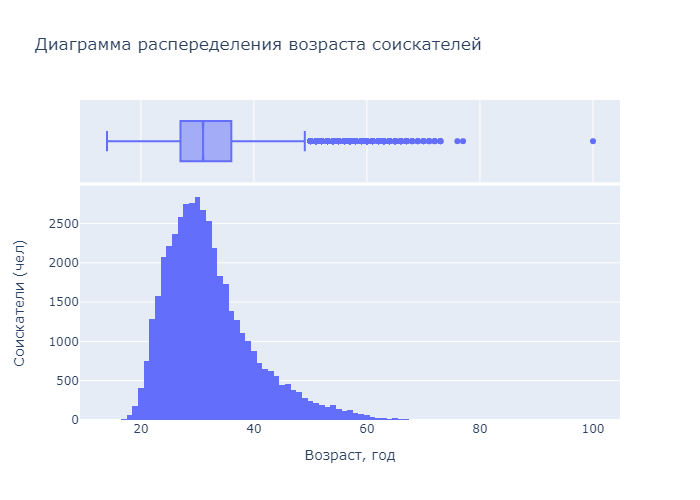

In [12]:
fig = px.histogram(hh_data['Возраст'],
                   marginal='box',
                   title='Диаграмма распеределения возраста соискателей'
)
fig.update_layout(
    legend_title='',
    showlegend = False,
    xaxis_title='Возраст, год',
    yaxis_title='Соискатели (чел)'
)
fig.show('png')
fig.write_html('plotly/hyst_age.html')

##### ваши выводы по графику здесь:
* мода составляет 30 лет;
* предельные значения признака: мин = 14, макс = 100;
* возраст большинства соискателей от 25 до 40 лет;
* аномалии - возраст 100 (похоже на выброс, так как на коробчатой диаграмме стоит очень далеко).

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

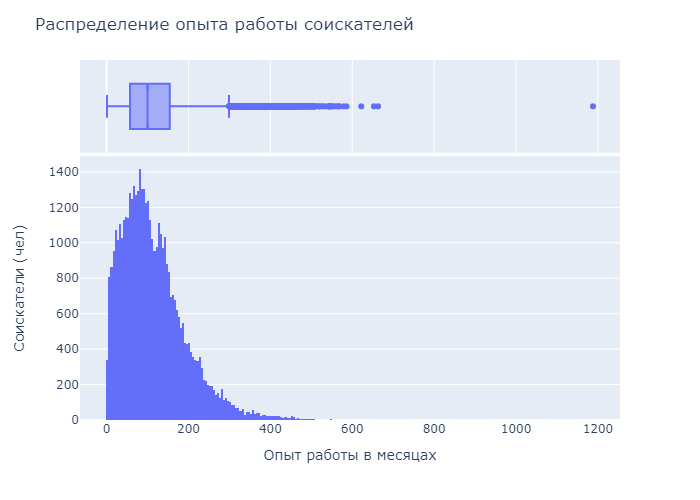

In [13]:
fig = px.histogram(hh_data['Опыт работы (месяц)'],
                   marginal='box')
fig.update_layout(
    title_text = 'Распределение опыта работы соискателей',
    showlegend = False,
    xaxis_title = 'Опыт работы в месяцах',
    yaxis_title = 'Соискатели (чел)'
)
fig.show('png')
fig.write_html('plotly/hyst_experience.html')

##### ваши выводы здесь:
* Мода распределения составляет 80-84 месяца;
* Минимальное и максимальное значения признака составляют 1 и 1188 месяцев соответственно;
* У большинства соискателей опыт работы - от 0 до 200 мес;
* аномалии: опыт работы с 1188 мес. или 100 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


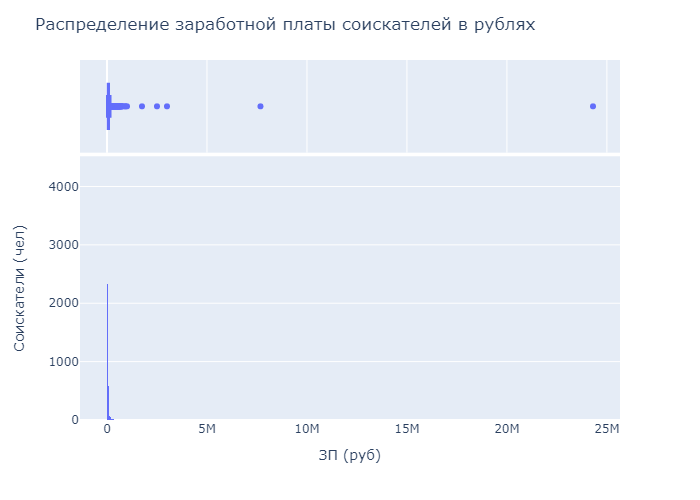

In [14]:
fig = px.histogram(hh_data['ЗП (руб)'],
                   marginal='box')
fig.update_layout(
    title_text = 'Распределение заработной платы соискателей в рублях',
    showlegend = False,
    xaxis_title = 'ЗП (руб)',
    yaxis_title = 'Соискатели (чел)'
)
fig.show('png')
fig.write_html('plotly/hyst_salary.html')

##### ваши выводы здесь
* Мода распределения составяет примено 50 тыс. рублей;
* Минимальное и максимальное значение признака желаемой заработной платы составляет 1 рублей и 24 млн. рублей соответственно;
* Желаемая заработная плата составляет до 180 тыс. рублей.
* аномалии: 5 осискателей хотят зарплату выше 1 млн рублей в месяц
* аномалии: желаемая зарплата 24 млн. рублей

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

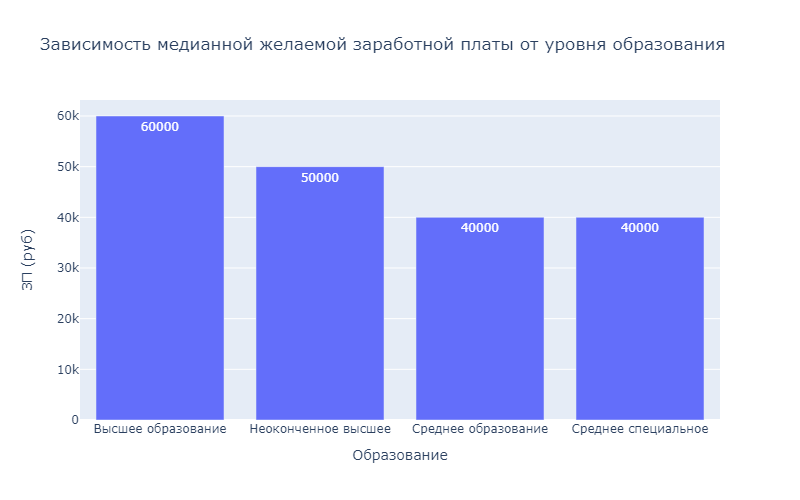

In [15]:
data_g = hh_data[hh_data['ЗП (руб)'] < 1000000]
bar_data = data_g.groupby(by='Образование', as_index=False)[['ЗП (руб)']].median()

# строим график
fig = px.bar(
    data_frame=bar_data,
    x = 'Образование',
    y = 'ЗП (руб)',
    text = 'ЗП (руб)',
    orientation='v',
    height=500,
    width=800,
    title = 'Зависимость медианной желаемой заработной платы от уровня образования'
)

# отображаем график
fig.show('png')
fig.write_html('plotly/bar_median_salary_lvl_educ.html')

##### ваши выводы здесь
* Наибольшие и наименьшие уровни желаемой ЗП являеются высшее и средне соотвественно
* Уровень образования влияет на уровень желаемой заработной платы. Стало быть, данный признак важен для прогнозирования заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

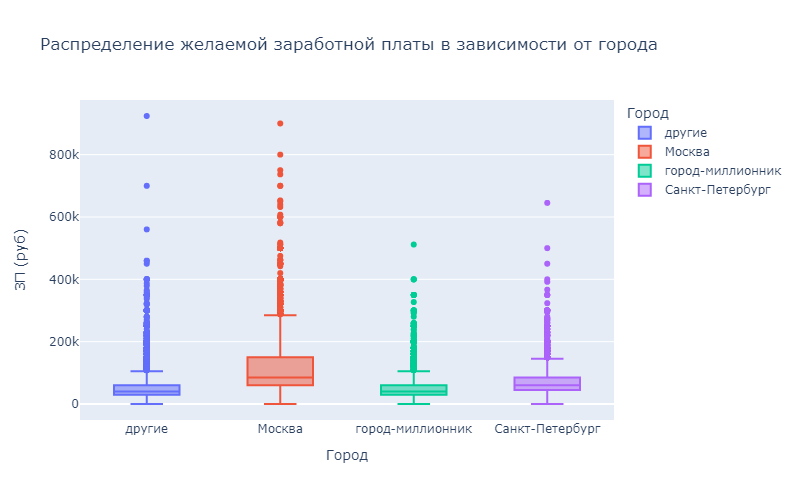

In [16]:
data_е = hh_data[hh_data['ЗП (руб)'] < 1000000]

# Строим график распределения
fig = px.box(
    data_frame=data_е,
    x = 'Город',
    y = 'ЗП (руб)',
    color = 'Город',
    height=500,
    width=800,
    title = 'Распределение желаемой заработной платы в зависимости от города'
)

# отображаем график
fig.show('png')
fig.write_html('plotly/box_salary_city.html')

##### ваши выводы здесь:
* В Москве и Санкт-Питербурге высокая заработная плата, очевидно
* Признак "Город" не столько важен для прогнозирования желаемой заработной платы, как значения почти идентичные.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

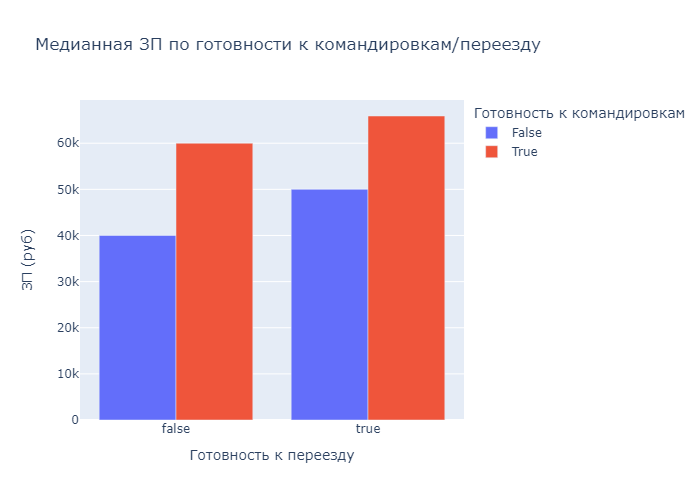

In [17]:
# ваш код здесь

ready_for_reloc_and_btrip = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=ready_for_reloc_and_btrip,
    y='ЗП (руб)',
    x='Готовность к переезду',
    barmode="group",
    color='Готовность к командировкам',
    orientation='v',
    title='Медианная ЗП по готовности к командировкам/переезду'
)
fig.show('png')
fig.write_html('plotly/median_salary_ready_for_reloc.html')

##### ваши выводы здесь:
* Очевидно, что медианная ЗП больше у тех кто готов к переезду и у тех кто к командировкам. А самая низкая ЗП это у тех кто не готов ни к перезду ни к командировкам
* желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам равна 66 т.р.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

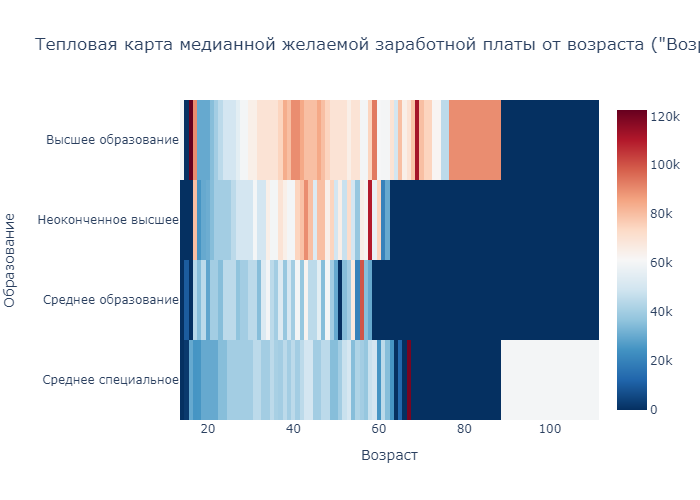

In [18]:
# Строим сводную таблицу
table = hh_data.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)

fig = px.imshow(table, color_continuous_scale='RdBu_r',
                title = 'Тепловая карта медианной желаемой заработной платы от возраста ("Возраст") и образования ("Образование")'
               )
fig.show('png')
fig.write_html('plotly/imshow_median_salary.html')

##### ваши выводы здесь:
* Аномалии: например высшее образование до 17 лет
* выская интенсивность увеличения ЗП у соискателей с высшим образования, а низкая интенсивность имеющих средние образование

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

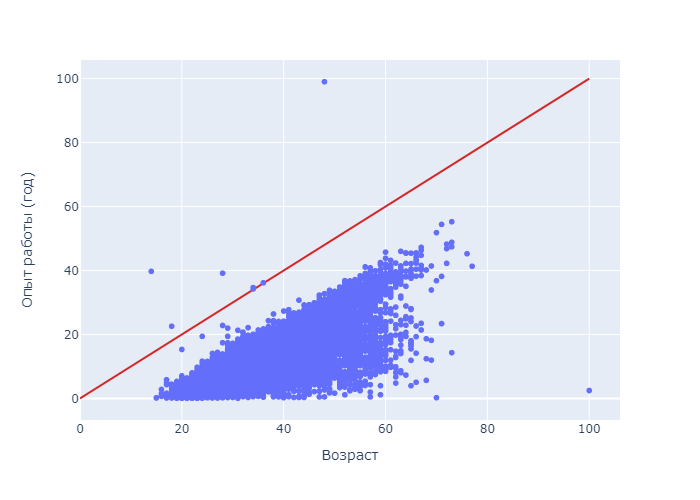

Количество резюме где опыт раобты больше возраста: 7


In [19]:
hh_data_scatter = hh_data.copy()
hh_data_scatter['Опыт работы (год)'] = hh_data_scatter['Опыт работы (месяц)']/12
fig = px.scatter(hh_data_scatter,
                 x='Возраст',
                 y='Опыт работы (год)',                                                     
                )
line_age_exp = pd.DataFrame(dict(
    x = [0, 100],
    y = [0, 100]))
fig.add_traces(list(px.line(line_age_exp, x='x', y='y', title = 'Граница аномалий', color_discrete_sequence=['#d62728']).select_traces()))
fig.update_layout(showlegend = True)
fig.show('png')
fig.write_html('plotly/scatter_age_vs_exp.html')

age_year =  hh_data['Возраст']
exp_year = hh_data['Опыт работы (месяц)']/12
# Количество выбросов в данных, где "Опыт" больше "Возраста"
print(f"Количество резюме где опыт раобты больше возраста: {hh_data[age_year<exp_year].shape[0]}")

##### ваши выводы здесь:
* Наблюдается 7 выбросов в признаке опыт работы, когда опыт работы соискателя больше его возраста


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


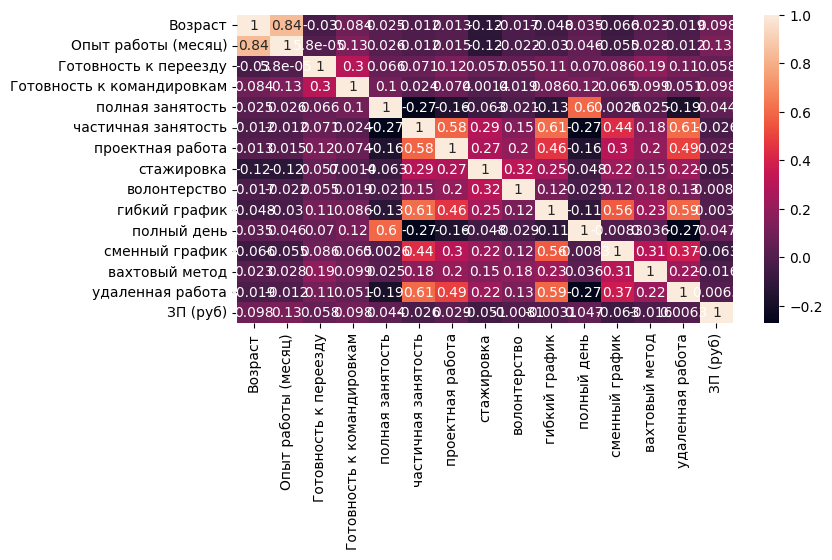

In [20]:
hh_data_corr = hh_data.copy()
hh_data_corr.drop(['Ищет работу на должность:', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность', 'Обновление резюме',
                   'Авто', 'Образование', 'Пол', 'Город'] , axis=1, inplace = True)
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(hh_data_corr.corr(), annot=True);


##### ваши выводы здесь:
* Посмотрим на матрицу корреляции и выбрем наиболее коррелированые признаки
* Видим, что корреляция признаков Возраста и Опыта работы высока 0,84, что уже выполнили в задании выше
* Можем сделать график распределения ЗП от графика работы, рисуем ниже

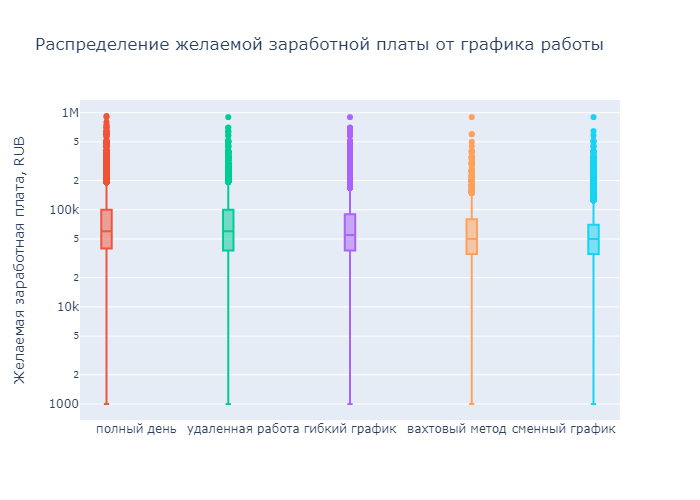

In [21]:
mask = (hh_data['ЗП (руб)'] < 1e6) & (hh_data['ЗП (руб)'] >= 1e3)
#построим диаграмму распределения ЗП в зависимости от графика занятости

schedule = ['полный день', 'удаленная работа', 'гибкий график', 'вахтовый метод', 'сменный график']

fig=px.box(
    title="Распределение желаемой заработной платы от графика работы",
    log_y=True
)

for el in schedule:
    fig.add_box(
y=hh_data[mask & hh_data[el]]['ЗП (руб)'],
name= el
)
    
fig.update_yaxes(title='Желаемая заработная плата, RUB')
fig.update_layout( legend_title='Занятость', showlegend = False)
fig.show('png')
fig.write_html('plotly/box_salary_schedule.html')


##### Ваши выводы здесь:
* Ниболее высокая желаемая заработная плата у тех кто готов работать полный день и удаленная работа, медиана составляет 60 тыс. рублей
* Наименьшие ожидания заработная плата, кто готов работать в режиме сменного графика

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
# ваш код здесь
#Находим полные дубликаты

dupl_data = hh_data.duplicated()
print(f"Количество полных копий: {dupl_data.sum()}")

#Удаляем дубликаты
hh_data = hh_data.drop_duplicates()

Количество полных копий: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
# ваш код здесь
display(hh_data.isnull().sum())
#Сколько пропусков в столбце «Опыт работы (месяц)»?
print(f"Число пропусков в столбце «Опыт работы (месяц)»: {hh_data['Опыт работы (месяц)'].isnull().sum()}")
# находим колличество выбросов по опыту работы


Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
ЗП (руб)                             0
dtype: int64

Число пропусков в столбце «Опыт работы (месяц)»: 168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
# ваш код здесь

median_experience = hh_data['Опыт работы (месяц)'].median()
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].fillna(median_experience)
#проверяем, что пропуски заполнились
display(hh_data['Опыт работы (месяц)'].isnull().sum())

hh_data = hh_data.dropna(subset = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], axis = 0)
#Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.
print(f"Cреднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков: {round(hh_data['Опыт работы (месяц)'].mean())}")


0

Cреднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
# ваш код здесь
salary_mask = (hh_data['ЗП (руб)']>1e6)|(hh_data['ЗП (руб)']<1e3)
#Сколько выбросов вы нашли в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей.
print(f"Количетсво выбросов по зарплате: {hh_data[salary_mask].shape[0]}")
#Создаем новую таблицу без выбросов
hh_data = hh_data[(hh_data['ЗП (руб)'] >= 1e3) & (hh_data['ЗП (руб)'] <= 1e6)]

Количетсво выбросов по зарплате: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [26]:
# ваш код здесь
# находим колличество выбросов по опыту работы
age_year =  hh_data['Возраст']
exp_year = hh_data['Опыт работы (месяц)']/12
# находим колличество выбросов
print(f"Количество резюме где опыт раобты больше возраста: {hh_data[age_year<exp_year].shape[0]}")
#Удаляем выбросы из таблицы
hh_data_cleaned = hh_data[age_year>exp_year]

Количество резюме где опыт раобты больше возраста: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [27]:
def outliers_z_score(data, feature, left=3, right=3, bias=1, log_scale=False):
    """Функция получает на вход числовые данные, проводит оценку на наличие выбросов методом z-отклонений и возвращает 
    исключенные данные и очищенные данные

    Args:
        data ([pd.DataFrame]): Входные данные в формате pd.DataFrame
        feature ([int, float]): Числовой признак, который подвергается анализу и чистке
        log_scale (bool, optional): Булевый аргумент для использования логарифмического масштаба, Defaults to False.
        left (int, optional): Поправочный коэффициент - соответствует количеству стандартных квадратичных отклонений влево
        right (int, optional): Поправочный коэффициент - соответствует количеству стандартных квадратичных отклонений вправо
        bias (int, optional): Cмещение по оси х для логарифмического масштаба, в случае наличия нулевых значений в данных

    Returns:
        [pd.DataFrame]: Возвращает два pd.DataFrame с исключенными данными outliers и очищенными данными data_cleaned
    """
    
    # Проверка включения логарифмического масштаба
    if log_scale:
        x = np.log(data[feature]+bias)
    else:
        x = data[feature]
    
    # Вычисление статистических величин
    mu = x.mean() #мат. ожидание
    sigma = x.std() #стандартное отклонение
    
    lower_bound = mu - left * sigma # Определение нижней границы распределения
    upper_bound = mu + right * sigma # Определение верхней границы распределения
    
    # очистка данных
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_data_cleaned, 'Возраст', 3, 4, bias=0, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


Text(0.5, 1.0, 'Распределение признака "Возраст" в логарифмическом масштабе')

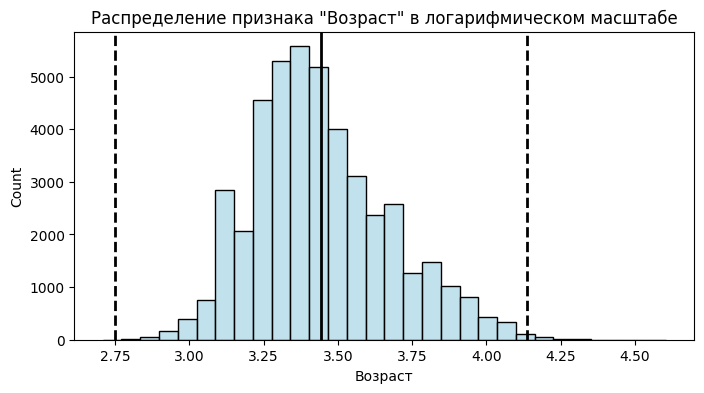

In [28]:
# ваш код здесь
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data_cleaned['Возраст'])
histplot = sns.histplot(log_age, bins=30, color= 'lightblue', ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение признака "Возраст" в логарифмическом масштабе')

##### ваш коммментарий здесь
* Распределение имеет правую ассиметрию.

In [29]:
#Сохраним полученные данные
hh_data_cleaned.to_csv('data/data_cleaned.csv')